# Multiclass Classification: One vs All
### A study of Iris dataset

When we need to do classification where our result can be of different Discrete types.
That is y can take ***Multiple Discrete values***, and not only two values 0 and 1, as before. 

In this case we can use Logistic Regression to classify the data by using the ***one vs all approach***.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

We are going to use the Iris dataset which is quite a famous dataset. And we will classify the iris flowers into their three species ***Setosa, Versicolour and Virginica*** based on their ***petal and sepal, length and width***.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data
print(type(data))
print(iris.feature_names,'are the feature names of the iris dataset')

<class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] are the feature names of the iris dataset


In [3]:
data = pd.DataFrame(data, columns=['s_l','s_w','p_l','p_w']) 
print(data.head(5))
print(data.tail(5))

   s_l  s_w  p_l  p_w
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
     s_l  s_w  p_l  p_w
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8


Now these above are the features which classify an iris flower into three species. Now we will load the iris.target in vector Y, which will have basically three values repeatedely, each corresponding to a species:
    
    y = 0 --> Setosa
    y = 1 --> Versicolour
    y = 2 --> Virginica

In [4]:
Y = pd.Series(iris.target)
print(Y.head(5))
print(Y.tail(5))

0    0
1    0
2    0
3    0
4    0
dtype: int64
145    2
146    2
147    2
148    2
149    2
dtype: int64


In one vs all technique, we run the logistic regression taking one feature and considering rest of the features as another feature, which reduces it to a binary feature Logistic Regression.

So let's do it for Setosa vs. rest first.

In [0]:
def Gradient_Descent(x, y, l_t, itr):
    #assuming x is (m,n) shaped and y is (m,) or (m,1) shaped
    m = x.shape[0]
    y = y.reshape(m,1)
    x = np.concatenate((np.ones((m,1)),x), axis=1)
    print(x[0:5,:])
    n = x.shape[1]
    theta = np.random.random(size=(1,n))*0.0001
    
    cost_func = []
    def cal_cost_func(h_xi):
        sum = np.sum( y*np.log(h_xi) + (1-y)*np.log(1-h_xi))
        return -sum/m
    
    for i in range(itr):
        h_xi = (1/(1 + np.exp(-np.dot(x,np.transpose(theta)))))
        cost_func.append(cal_cost_func(h_xi))
        theta = theta - (l_t/m) * np.dot(np.transpose(h_xi- y) , x)
    
    return theta,cost_func

In [16]:
x = data.values
y1 = np.vstack((np.zeros((50,1)), np.ones((100,1))))
print( y1[:5,:], y1[145:150,:], sep='\n')

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


So in array y, indices 0 to 49, have value=0, indicating setosa. And indices 50 to 149 have  value=1, indicating the rest. ***Setosa as y=0 and rest as y1***.

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]]
[[-0.3367892  -0.52894995 -1.81264813  2.83189864  1.28137508]]


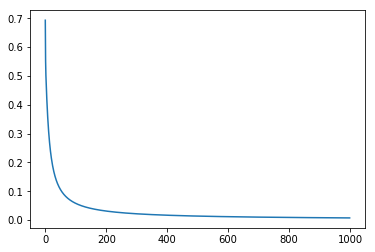

In [17]:
itr = 1000
theta1, cost_func1 = Gradient_Descent(x, y1, 0.1, itr)
print(theta1)
plt.plot(np.arange(itr),cost_func1)

In [8]:
y2 = np.vstack((np.ones((50,1)), np.zeros((50,1)), np.ones((50,1)) ))
print( y2[:5,:], y2[50:55,:], y2[100:105,:], sep='\n')

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


Hence we make an array y2 of size (150,1). The indices 0 to 49 have y = 1, 50 to 99 have y=0 and 100 to 149 have y=1. Thus giving  ***versicolour as y=0 and rest as y=1***.

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]]
[[-5.69570267  0.03393107  2.55905182 -1.24178075  2.76210125]]


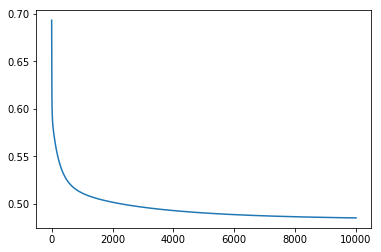

In [37]:
itr = 10000
theta2, cost_func2 = Gradient_Descent(x, y2, 0.13, itr)
print(theta2)
plt.plot(np.arange(itr),cost_func2)

In [10]:
y3 = np.vstack((np.ones((100,1)), np.zeros((50,1))))
print( y3[:5,:], y3[100:105,:], sep='\n')

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Now y3 has indices 0 to 99 as y=1 and 100 to 149 as y=0. Thus ***Virginica as y=0 and rest as y=1***.

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]]
[[ 4.74966124  3.91965661  4.17405587 -5.90363454 -7.33167576]]


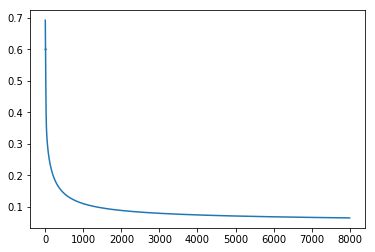

In [35]:
itr = 8000
theta3, cost_func3 = Gradient_Descent(x, y3, 0.15, itr)
print(theta3)
plt.plot(np.arange(itr),cost_func3)

Hence all the one vs. rest logistic regression are done now. Now we would define a func which will predict the species when given with a new data.

Basically, we have $h^{i}_{(\theta)}(x)$ where i=(0,1,2) corresponding to each of (setosa,versicolor,virginica). Now higher value of $h^{i}_{(\theta)}(x)$ means higher probabiliity of new flower being of speices (i). 

And higher $h^{i}_{(\theta)}(x)$ means higher  $\theta_{0} + \theta_{1} x_{1} + ...  \theta_{n} x_{n}$, as $h^{i}_{(\theta)}(x)$ is ***sigmoid function***.

So we will compare $\theta (x)$ and predict the species as the one which has highest value of $\theta (x)$.

In [39]:
def predict(f):
    f = np.hstack((np.array([1]),f))  #adding f_0=1
    f = f.reshape(5,1)
    pred_val=[np.dot(theta1,f), np.dot(theta2,f), np.dot(theta3,f)]
    return np.argmin(pred_val)  #returns the index of the maximum value in array

flower = np.array([1,1,1,1])
print(predict(flower))

1


Hence it is a Versicolour. Now let us measure the accuracy of our model using the metrics library of scikit learn. 

We will test the model by giving it the entire data which it trained on, and then compare it's prediction with the results we have, in form of array Y.

In [38]:
from sklearn.metrics import accuracy_score
y_pred = np.zeros((150))
for i in range(150):
    y_pred[i] = predict(x[i])

print(accuracy_score(Y.values,y_pred))
print(y_pred)

0.9733333333333334
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


Hence the prediction of our model is a staggering ***97.33% ACCURATE***. It is very nice to see that.